In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

In [2]:
company=pd.read_csv("E:\\Company_Data.csv")

In [3]:
#Creating dummy vairables dropping first dummy variable
company=pd.get_dummies(company,columns=['Urban','US'], drop_first=True)

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [5]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
company['ShelveLoc']=company['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [6]:
x=company.iloc[:,0:6]
y=company['ShelveLoc']

In [7]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [8]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [9]:
company['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [10]:
company.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [11]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

# Building Decision Tree Classifier using Entropy Criteria

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

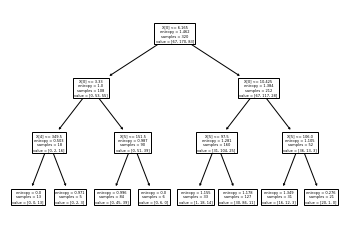

In [14]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

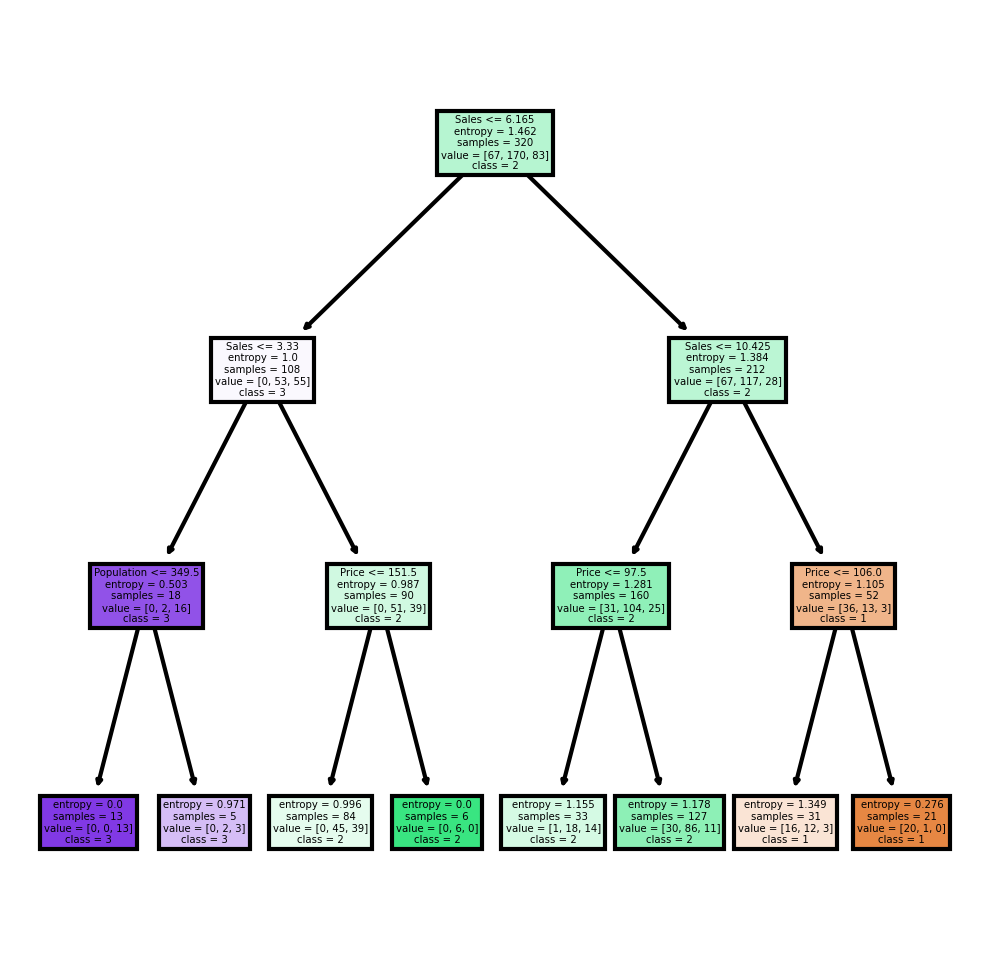

In [15]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    63
1    13
3     4
dtype: int64

In [17]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [18]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [19]:
# Accuracy 
np.mean(preds==y_test)

0.625

# Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

# Decision Tree Regression Example

In [22]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
array = company.values
X = array[:,0:3]
y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
#Find the accuracy
model.score(X_test,y_test)

-1.3355542651059022